# Hierarchical Clustering - R Language

# Scenario

 We want to sort different sources of protien into groups based on common characteristics, but how do we group them?
 Unlike other scenarios where we know how many groups we're looking for, here we don't. This calls for hierarchical clustering.
 In other words, we'll use a clustering model that will treat each source of protien as a seperate cluster, and start pairing
 them together one at a time until we have one big cluster that concludes all sources. Then, we'll be able to decifer how many
 groups we have and characterize them. Let's get to it!

First let's load our data set and see what we're looking at.

In [1]:
proteins = read.csv("Proteins.csv")
head(proteins)

source,energy,protein,fat,iron
BEEF BRAISED,340,20,28,2.6
HAMBURGER,245,21,17,2.7
BEEF ROAST,420,15,39,2.0
BEEF STEAK,375,19,32,2.6
BEEF CANNED,180,22,10,3.7
CHICKEN BROILED,115,20,3,1.4


 Ok, so are data is intact and all features are numerical as well. which means we can get straight to it.
 First and foremost we have to scale our features in order to set their relative distance from  one another.
 This will yield a mean = 0 and stadnerd deviation of 1 for each feature in our data set. We'll be scaling via Standard Scalar
 to get our Z distributions.

In [2]:
z_proteins = as.data.frame(scale(proteins[,2:5]))
head(z_proteins)

energy,protein,fat,iron
1.2763184,0.25984078,1.2536428,0.1497111
0.3545329,0.49280147,0.2924046,0.2168230
2.0525589,-0.90496270,2.2148809,-0.2529602
1.6159236,0.02688008,1.6031839,0.1497111
-0.2761625,0.72576217,-0.3192924,0.8879419
-0.9068578,0.25984078,-0.9309894,-0.6556315


In [3]:
round(colMeans(z_proteins), 1)

energy protein     fat    iron 
      0       0       0       0

In [4]:
apply(z_proteins, 2, sd)

energy protein     fat    iron 
      1       1       1       1

So now that our data is scaled properly, we would like to know the euclidean distance between each source to all other sorces.
We'll take a look at the distance between Hamburger and Beef Steak as an example.

In [5]:
d = dist(z_proteins)
d

            1          2          3          4          5          6          7
2  1.35367724                                                                  
3  1.74511873 2.95865653                                                       
4  0.54016793 1.87905182 1.26305136                                            
5  2.37621325 1.12987658 3.97566332 2.88259013                                 
6  3.19177901 1.97566371 4.49149853 3.67277938 1.83620569                      
7  2.82669371 1.67633852 4.38672950 3.35081039 1.65726135 1.32975517           
8  3.73477650 2.78364888 5.34875733 4.18125730 1.81020261 3.36088532 2.96883549
9  1.00910870 0.40639847 2.55685133 1.51429076 1.48522989 2.23019560 2.01046169
10 0.69063869 1.15499566 1.83885860 0.99928188 2.19658694 2.73862167 2.64816004
11 0.06711188 1.35865893 1.73086548 0.54432104 2.39791191 3.17550958 2.80991338
12 0.25770308 1.47797107 1.53202454 0.43423656 2.51075167 3.24462285 2.97000789
13 0.35215740 1.63930757 1.39882199 0.29

We can see for instance that the euclidean distance between Hamburger and Beef Steak is 1.87905182497182

In [6]:
as.matrix(d)[2,4]

[1] 1.879052

In [7]:
# Manually we would do it like this
sqrt(sum((z_proteins[2,]-z_proteins[4,])**2))

[1] 1.879052

Alright, all is set and we're ready to fit our model onto the data set. We'll be using the ward method for our model.
Also, we should visualize our data via a Dendrogram to see the groups.

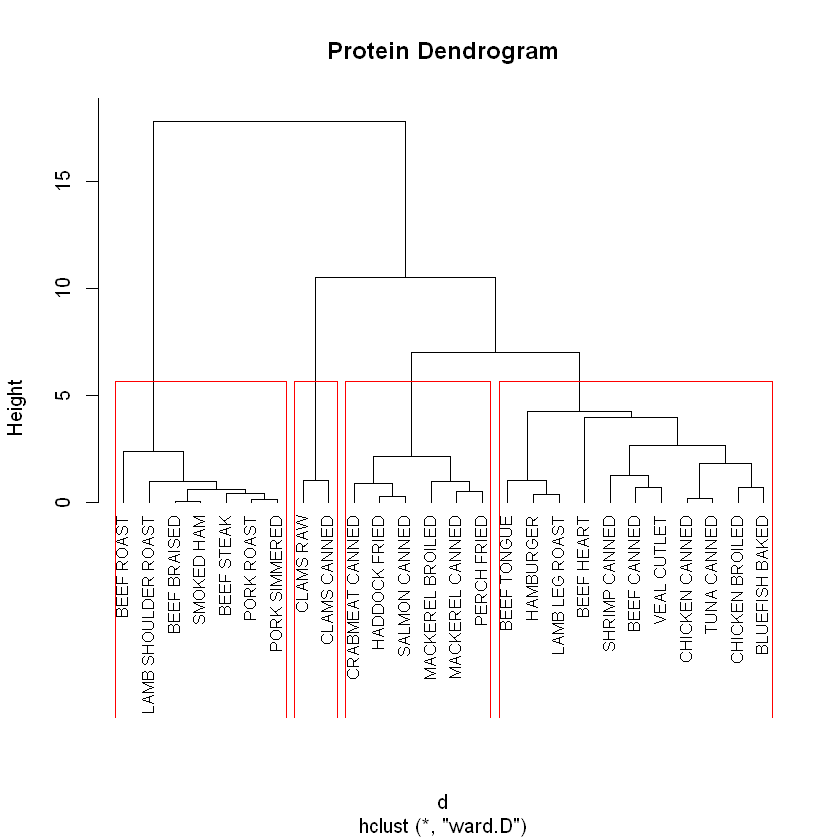

In [8]:
clusters = hclust(d, method="ward.D")

plot(clusters, main="Protein Dendrogram", labels=proteins[,1], cex=0.8, hang=-1)
rect.hclust(clusters, k=4)

Ok, as we can see there are 4 different groups(clusters) of Sources. Each Source was linked to the clossest one to it, and the
proccess continued until all porints were conncected.

If we look at our model we can which points were connected and at what distance. We have 26 Sources, so there are 25 
connections.

For example, we can see that Source 1 (Beef Braised) was merged with Source 11 (Smoked Ham) first.
At level 12, source 10 (Llamb Shoulder Roast) merged with clusters that were formed in stage 1 & 6.
In other words, source 10 merged with sources 1, 11, 12(Pork Roast), 13(Pork Simmered) and 4(Beef Steak).
And eventually at the last stage merged all data points together into one big cluster.

In [9]:
clusters$merge

-1,-11
-12,-13
-7,-25
-20,-24
-2,-9
-4,2
-22,-23
1,6
-5,-15
-6,-16
-19,4


Let's assign each source it's relevant cluster.

In [10]:
proteins$cluster = cutree(clusters, k=4)
head(proteins)

source,energy,protein,fat,iron,cluster
BEEF BRAISED,340,20,28,2.6,1
HAMBURGER,245,21,17,2.7,2
BEEF ROAST,420,15,39,2.0,1
BEEF STEAK,375,19,32,2.6,1
BEEF CANNED,180,22,10,3.7,2
CHICKEN BROILED,115,20,3,1.4,2


Alright, now that we assigend the Sources to clusters we can start analyzing!
Let's first see the size of our clusters.

In [11]:
table(proteins$cluster)


 1  2  3  4 
 7 11  2  6 

Ok, let's see how the clusters differentiate from one another by thier mean values.

In [12]:
mean_proteins = aggregate(cbind(energy, protein, fat, iron)~cluster, proteins, mean)
mean_proteins

cluster,energy,protein,fat,iron
1,352.8571,18.57143,30.142857,2.414286
2,176.3636,22.27273,8.818182,2.490909
3,57.5000,9.00000,1.000000,5.700000
4,149.1667,16.33333,7.500000,1.016667


Now let's plot all of our new data.

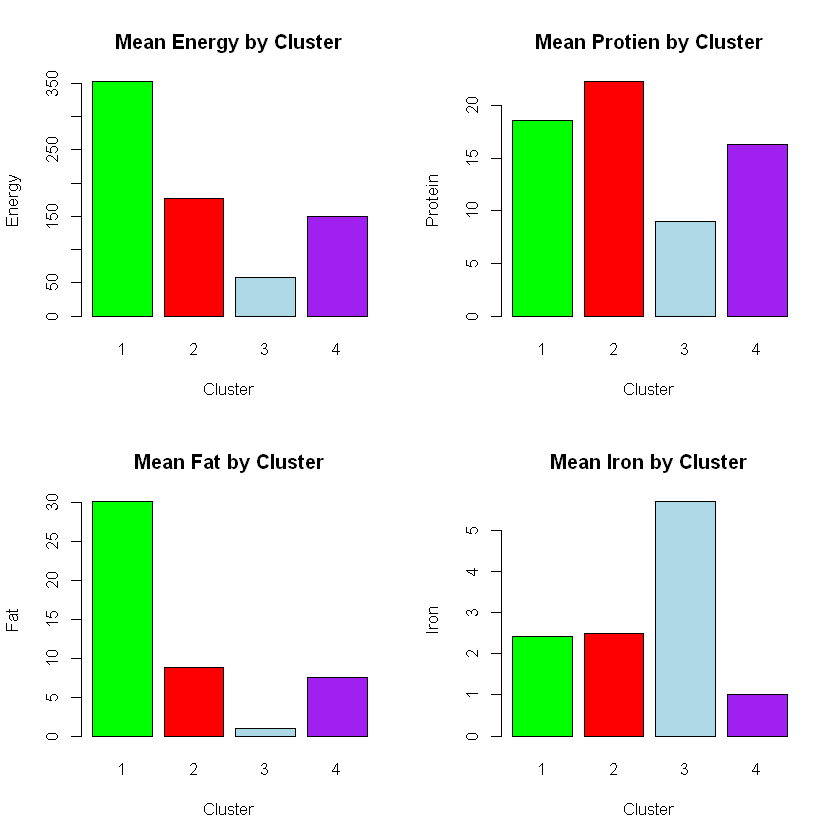

In [13]:
par(mfrow=c(2,2))
xTicks = mean_proteins[,1]
colors = c("green" ,"red", "lightblue", "purple")
barplot(mean_proteins$energy, main="Mean Energy by Cluster", names.arg=xTicks, xlab="Cluster", ylab="Energy", col=colors)
barplot(mean_proteins$protein, main="Mean Protien by Cluster", names.arg=xTicks, xlab="Cluster", ylab="Protein", col=colors)
barplot(mean_proteins$fat, main="Mean Fat by Cluster", names.arg=xTicks, xlab="Cluster", ylab="Fat", col=colors)
barplot(mean_proteins$iron, main="Mean Iron by Cluster", names.arg=xTicks, xlab="Cluster", ylab="Iron", col=colors)

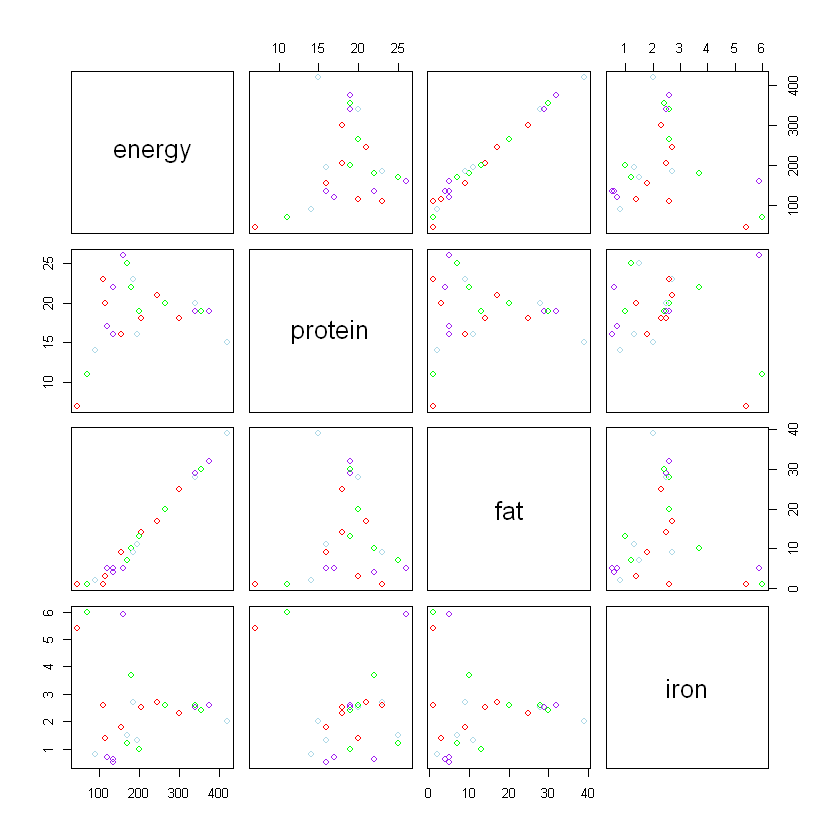

In [14]:
plot(proteins[,2:5], col=colors)

Cluster 1 seems to consist of all the smoked and roasted red meets. high in fat, protiens and energy.

In [15]:
subset(proteins, proteins$cluster == 1)

,source,energy,protein,fat,iron,cluster
1,BEEF BRAISED,340,20,28,2.6,1
3,BEEF ROAST,420,15,39,2.0,1
4,BEEF STEAK,375,19,32,2.6,1
10,LAMB SHOULDER ROAST,300,18,25,2.3,1
11,SMOKED HAM,340,20,28,2.5,1
12,PORK ROAST,340,19,29,2.5,1
13,PORK SIMMERED,355,19,30,2.4,1


Cluster 2 seems to consist of clams. high in iron but low on the rest.

In [16]:
subset(proteins, proteins$cluster == 2)

,source,energy,protein,fat,iron,cluster
2,HAMBURGER,245,21,17,2.7,2
5,BEEF CANNED,180,22,10,3.7,2
6,CHICKEN BROILED,115,20,3,1.4,2
7,CHICKEN CANNED,170,25,7,1.5,2
8,BEEF HEART,160,26,5,5.9,2
9,LAMB LEG ROAST,265,20,20,2.6,2
14,BEEF TONGUE,205,18,14,2.5,2
15,VEAL CUTLET,185,23,9,2.7,2
16,BLUEFISH BAKED,135,22,4,0.6,2
25,TUNA CANNED,170,25,7,1.2,2


Cluster 3 seems to consist of all the the fish sources of protien. pretty average amongst the other clusters.

In [17]:
subset(proteins, proteins$cluster == 3)

,source,energy,protein,fat,iron,cluster
17,CLAMS RAW,70,11,1,6.0,3
18,CLAMS CANNED,45,7,1,5.4,3


Cluster 4 seems to consist of high sources of protien while pretty average on the rest of the features.
In other words, your casual sources of protien.

In [18]:
subset(proteins, proteins$cluster == 4)

,source,energy,protein,fat,iron,cluster
19,CRABMEAT CANNED,90,14,2,0.8,4
20,HADDOCK FRIED,135,16,5,0.5,4
21,MACKEREL BROILED,200,19,13,1.0,4
22,MACKEREL CANNED,155,16,9,1.8,4
23,PERCH FRIED,195,16,11,1.3,4
24,SALMON CANNED,120,17,5,0.7,4
